Mappeoppgave 1 - Samfunnsøkonomisk analyse av en turistskatt

In [37]:
#laster ned nødvendige pakker
import json
import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [11]:
postUrl = "https://data.ssb.no/api/v0/no/table/10638/"

postUrl1 = "https://data.ssb.no/api/v0/no/table/09374/"

postUrl2 = "https://data.ssb.no/api/v0/no/table/12892/"

In [12]:
apiQuery ={
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [15]:
apiQuery1 ={
  "query": [
    {
      "code": "Overnatt",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2010M01",
          "2010M02",
          "2010M03",
          "2010M04",
          "2010M05",
          "2010M06",
          "2010M07",
          "2010M08",
          "2010M09",
          "2010M10",
          "2010M11",
          "2010M12",
          "2011M01",
          "2011M02",
          "2011M03",
          "2011M04",
          "2011M05",
          "2011M06",
          "2011M07",
          "2011M08",
          "2011M09",
          "2011M10",
          "2011M11",
          "2011M12",
          "2012M01",
          "2012M02",
          "2012M03",
          "2012M04",
          "2012M05",
          "2012M06",
          "2012M07",
          "2012M08",
          "2012M09",
          "2012M10",
          "2012M11",
          "2012M12",
          "2013M01",
          "2013M02",
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [14]:
apiQuery2 = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:LandetNyn",
        "values": [
          "0N"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [16]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

In [17]:
#laster inn datasett
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df_2010, df_id, ds = apiToDataframe(postUrl1, apiQuery1)

df_2019, df_id, ds = apiToDataframe(postUrl2, apiQuery2)

Innholdsfortegnelse

Kapittel 1 - Innledning	

1.1 Bakgrunn for utredningen	

1.2 Formålet med en turistskatt og tidligere erfaringer	

Kapittel 2 - Turistnæringen i Norge	

2.1 Reiselivsbransjen og sesongvis turisme	

2.2 Et voksende cruise og utleiemarked	

2.3 Hvorfor dette er viktig i analysen	

Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt	

3.1 Overnattingsmarkedet med og uten skatt	

3.2 Effektivitets- og fordelingseffekter av tiltaket	

3.3 Hvor store effekter kan vi forvente.	

Konklusjon	

Bibliografi	

Kapittel 1 - Innledning

1.1 Bakgrunn for utredningen

Regjeringen vil gi kommuner muligheten til å innføre turistskatt for å finansiere fellesgoder. Turistskatt og besøksbidrag er to av forslagene som presentert, og disse vil bli brukt for å produsere fellesgoder som øker den totale turistopplevelsen. I budsjettenigheten med SV ble det klart regjeringen vil legge fram et forslag om innføring av en turistskatt (besøksbidrag) i statsbudsjettet for 2024. Næringsminister Jan Christian Vestre vil sette igang pilot prosjekter ulike steder for å få kunnskap på et kommunalt og statlig nivå (Regjeringen.no, 2023). Hensikten med utredningen er å se på ulemper og fordeler med en overnattingsskatt, og hvordan denne kan implementeres mest effektivt. 

1.2 Formålet med en turistskatt og tidligere erfaringer

En turistskatt på overnattinger kommer ofte i form som en avgift som må betales per natt, per person og legges oppå den opprinnelige prisen på overnattingen. Dens formål er å bidra finansiering av fellesgoder og miljøtiltak lokalt. Skatten skal gjøre turister medansvarlig for å betale for disse godene, og ikke bare lokale bedrifter og myndigheter. Eksempler på disse fellesgodene er offentlige toaletter, turstier, og andre goder som gir turister og andre brukere en bedre helhetlig opplevelse av norsk natur (NHO reiseliv, u.d.).

Turistskatt på overnattinger er relativt vanlig i land og byer rundt omkring i verden, og har hatt både positive og negative konsekvenser. Et eksempel på en positiv implementering av turistskatten i Venezia. Overnattingsskatten i Venezia ble introdusert i 2011. Den betales til og med den 5 overnattingen, og har hatt positive ringvirkninger for byen. Byen er et episenter for turismen i Italia og den store økningen i turisme har skapt problemer som forsøpling, og andre miljøskader som skatten har vært med å redusere. En ny besøksskatt ble annonsert i 2019, men grunnet covid-19 og rekordflom er den blitt utsatt. Denne skatten skal håndtere det nye problemet med dags-turister, som unngår overnattingsskatten. Myndighetene skal iverksette et system utfra hvor travelt det er forventet at byen vil være, og avgiften blir justert deretter (mellom 3 og 10 euro).  Turistskatten i Venezia er blitt viktig for finansiering av mer effektive løsninger på avfalls og miljø problemer (Venezia autentica, u.d.). 


Det har også vært eksempler på utfordringer knyttet til en turistskatt. Latvia var tidlig ute med å introdusere en skatt på besøkende, og allerede i 1891 ble det innført avgift på besøkende til Jurmala. Denne ble fjernet i 1997 grunnet den administrative byrden dette medførte.(Laura Pole, 2021). Også nyere forsøk på å introdusere turistskatt i Abava heritage valley (2010) og Carnikava (2011) mislyktes. Lite planlegging og forskning var faktisk gjort for å finne hvordan en slik skatt kunne påvirke miljø og turistopplevelsen. Gjeninnføringen var preget av store uenigheter mellom myndighetene og de private aktørene, som skulle inkreve skatten.

Kapittel 2 - Turistnæringen i Norge

2.1 Reiselivsbransjen og sesongvis turisme

In [18]:
#omforvaldler data
df_utenland = df[df['konsumentgruppe'] == 'Utlendingenes konsum i Norge']
df_total = df[df['konsumentgruppe'] == 'Totalt konsum']

df_løpende_priser_utenland = df_utenland[df_utenland['statistikkvariabel'] == 'Løpende priser (mill. kr)']
df_faste_priser_utenland = df_utenland[df_utenland['statistikkvariabel'] == 'Faste 2020-priser (mill. kr)']


df_løpende_priser_total = df_total[df_total['statistikkvariabel'] == 'Løpende priser (mill. kr)']
df_faste_priser_total = df_total[df_total['statistikkvariabel'] == 'Faste 2020-priser (mill. kr)']


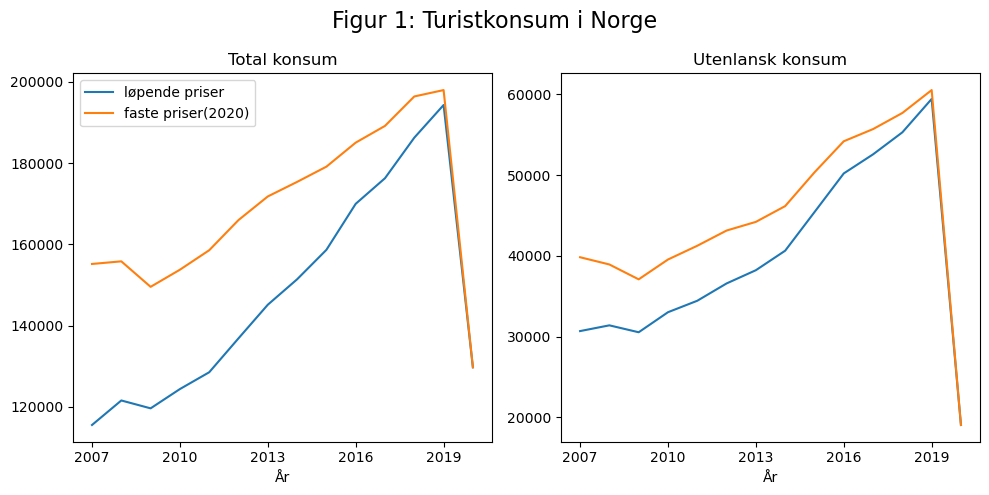

In [34]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 


axes[0].plot(df_løpende_priser_total['år'], df_løpende_priser_total['value'], label='løpende priser')
axes[0].plot(df_faste_priser_total['år'], df_faste_priser_total['value'], label='faste priser(2020)')
axes[0].set_xlabel('År')
axes[0].set_ylabel('')
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(3)) #lager breaks
axes[0].set_title('Total konsum')


axes[1].plot(df_løpende_priser_utenland['år'], df_løpende_priser_utenland['value'])
axes[1].plot(df_faste_priser_utenland['år'], df_faste_priser_utenland['value'])
axes[1].set_xlabel('År')
axes[1].set_ylabel('')
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
axes[1].set_title('Utenlansk konsum')

fig.suptitle('Figur 1: Turistkonsum i Norge', fontsize=16)

# add legend to each subplot
axes[0].legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Figur 2: Antall overnattinger i Norge 2010-20')

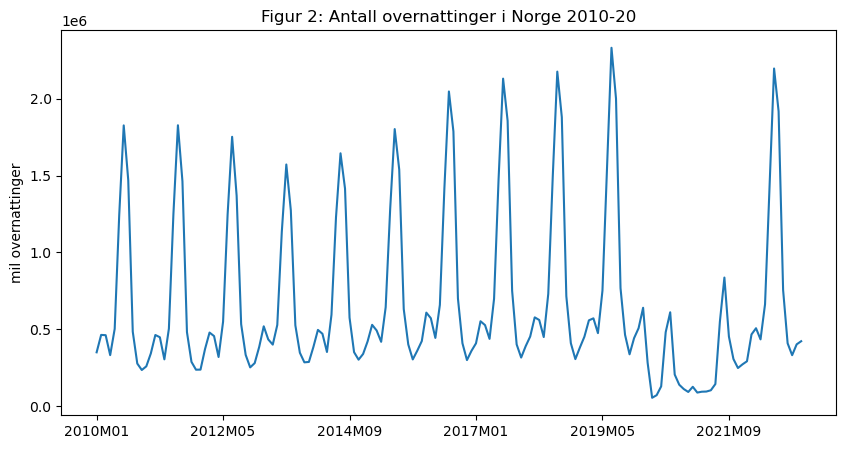

In [36]:
df_2010_2019 = pd.concat([df_2010, df_2019])


p_num=np.linspace(0,500)


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_2010_2019['måned'], df_2010_2019['value'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
ax.set_xlabel('')
ax.set_ylabel('mil overnattinger')
ax.set_title('Figur 2: Antall overnattinger i Norge 2010-20')



Hotelløkonomien og reiselivsbransjen som en helhet er en viktig del av norgk økonomi, og har de siste tiårene har bransjen hatt en stabil vekst. Antallet hotellovernattinger har økt med nesten 40 prosent, fra 25.5 millioner i 2010 til 35.,6 millioner i 2019 (figur 2). I likhet med mange andre land ble Norge truffet av covid-19 pandemien i 2020, noe som førte til en nedgang i overnattinger og turistenes konsum, og førte til en lavkonjunktur i hele reiselivsbransjen. Etter dette har bransjen stabilisert seg, og antall hotellovernattinger er tilbake på et nesten før-covid nivå.


I Norge kan turistsesongen deles i ulike perioder (figur 2). Høysesongen i Norge er fra mai til september, med høyest antall overnattinger i juli. Generelt sett har Norge en relativt liten variasjon i turismen mellom sesongene, og økningen mellom lavsesongen (januar) 2022 og høysesong (juli) 2022 er på 281 prosent. Eksempelvis er økningen i Italia på omtrent 400 prosent i samme periode (statista, 2022). Dette kan skyldes en økende vintertilbud, hvor markedsføringen har et søkelys på vintersport, nordlys og naturopplevelser. I Tromsø har antall overnattinger steget fra 18000 i 2008 til 200000 i 2018, hvor store deler av turistene ankommer utenom høysesongen (NHO reiseliv, u.d.).  



2.2 Et voksende cruise og utleiemarked

I Norge har antall cruise passasjerer har økt fra 588,000 i 2012 til 944,994 i 2019 (innovasjon Norge, 2019). Etter en generell nedgang i 2020 grunnet covid-19, har cruiseturismen hatt en ytterlig økning på 20 prosent fra 2019 til 2022 (Anja, 2023). De siste årene har det også blitt populært å leie overnattingssted fra privatpersoner, gjennom eksterne plattformer som airbnb. Fra 2009 til 2019 var airbnbs sammensatte vekstrate på 153 prosent (Deane, 2022), og fra 2017 til 2019 vokste aktive oppføringer med 1.6 prosent månedlig (Williams, 2023). 


2.3 Hvorfor dette er viktig i analysen
Disse momentene er viktig for en innføring av turistskatt i Norge av flere grunner. I høysesongen kan det være grunnlag for en økt skatt i perioder med høyt trykk. Den økende cruiseturismen fører i antallet dagsturister, som ikke pålegges en overnattingsskatt. For disse kan det iverksettes en annen beskatning, kanskje noe lignende besøkskatten som Venezia. Den raskt voksende private utleiebransjen, vil også kunne gjøre vanskeligere å innkreve skatten. 

Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt


3.1 Overnattingsmarkedet med og uten skatt 

In [5]:
# Tilbud og etterspørsels funksjoner tatt fra forelesning 5

def x_d(p,T):
    return 500 - 3.2*(p+T)



def x_s(p,t):
    return -100+4.3*(p-t)

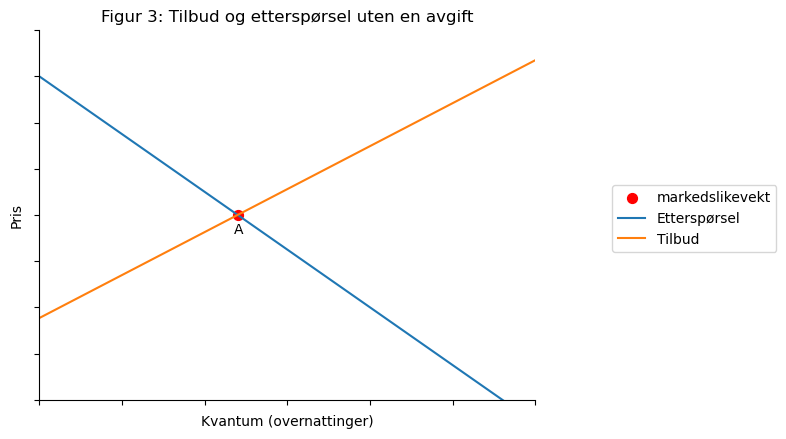

In [32]:
p_num=np.linspace(0.1,300,100)


def create_ax():
    fig, ax = plt.subplots()
    ax.set(xlim=(220,280))
    ax.set(ylim=(70,90))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    return fig, ax

fig, ax = create_ax()

# plott funksjonene
ax.scatter(244,80, s=50, color="red", label="markedslikevekt")
ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.text(243.5, 79, "A")


# tittel
ax.set_title('Figur 3: Tilbud og etterspørsel uten en avgift')

ax.set_xlabel('Kvantum (overnattinger)')
ax.set_ylabel('Pris')

#vis navnene utenfor plottet:
ax.legend(bbox_to_anchor=(1.5,0.6));


Figur 3 viser hva som kan skje når overnattingsmarked opplever beskatning. I et marked uten skatt på overnattinger vil tilbud og etterspørsel bestemme markedslikevekten (figur 3). I dette markedet bestemmer kun tilbud og etterspørsel hva likevekten skal være, og det er gitt at prisen er i krysningspunktet mellom tilbud og etterspørselskurvene (punkt A). 

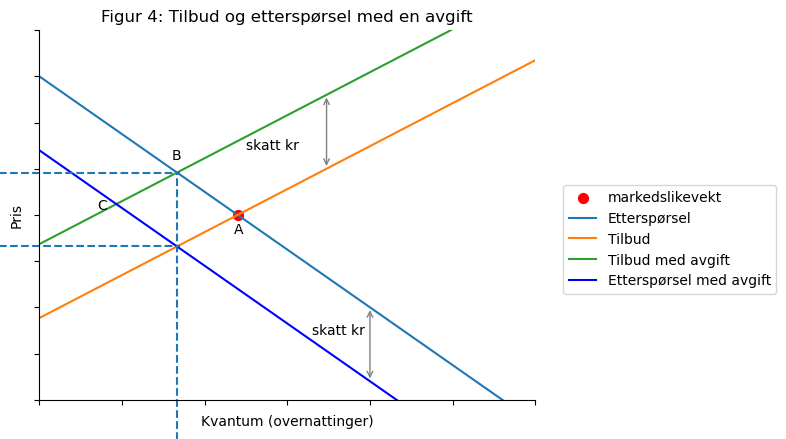

In [33]:
p_num=np.linspace(0.1,300,100)

ax.plot(x_s(p_num, 4),p_num, label='Tilbud med avgift')

ax.text(236, 83, "B")

# tittel
ax.set_title('Likevekt med en avgift')
ax.plot(x_d(p_num,4),p_num, label='Etterspørsel med avgift', color='blue')
ax.text(227, 80.3, "C")

ax.text(245, 83.5, "skatt kr")

ax.annotate("", (x_s(82.5,0),82.5), (x_s(86.5,4), 86.5), arrowprops={"arrowstyle":"<->", "color":"gray"})

ax.text(253, 73.5, "skatt kr")

ax.annotate("", (x_d(75,0),75), (x_d(71,4), 71), arrowprops={"arrowstyle":"<->", "color":"gray"})

ax.set_title('Figur 4: Tilbud og etterspørsel med en avgift')


ax.legend(bbox_to_anchor=(1.6,0.6))

ax.vlines(236.66133333333332,65, 82.3, linestyles='dashed', clip_on=False)
ax.hlines(78.29333333333334200,200, 237, linestyles='dashed', clip_on=False)
ax.hlines(82.29333333333334,200,237, linestyles='dashed', clip_on=False)

q=np.linspace (220, 236.66133333333332, 100)

ax.legend(bbox_to_anchor=(1.5,0.6));

fig

En innføring av en skatt på overnattinger (Figur 4) fører til at prisene øker og likevekten vil forskyves lenger opp på etterspørselskurven (punkt B). Det er også et mulig scenario at etterspørselen synker i takt med tilbudet (punkt C), og det oppstår et dødvekts tap da den naturlige likevekten ikke kan forekomme. I modellen (Figur 4) vil etterspørselen trekkes lengere opp langs tilbudskurven, og hoteller kan være nødt til å senke prisen, for å unngå tapte inntekter grunnet lavere på etterspørsel.

Det er også mulig at en overnattingsskatt vil redusere etterspørselen, da norske hoteller allerede er blant de dyreste i verden. En skatt oppå dette kan gjøre den norske næringen mindre konkurransedyktig. Et eksempel på at prisnedgang øker etterspørselen er at når kronen svekket seg i 2014 vokste næringen (figur 1 og 2). Merverdiavgiften på transport og kultur har også økt fra 8 til 12 prosent over noe få år, noe som sammen med allerede høye priser kan gjøre det vanskelig å tiltrekke seg turister ved en eventuell innføring av turistskatt, og dermed gjøre Norge til et mindre attraktivt reisemål (NHO reiseliv, u.d.).

3.2 Effektivitets- og fordelingseffekter av tiltaket

En turistskatt vil gi lokalsamfunn økt finansiering for både nye og eksisterende prosjekter. Dette kan gi en økt sysselsetning innenfor bransjen og en finansiering av effektivitetsøkende tilbud, som bedre turistinformasjon og transporttilbud. En turistskatt vil også kunne redusere skattebyrden til beboerne ved at inntektene til lokale myndigheter i større grad knyttes til turister, noe som vil føre til at finansieringen av fellesgoder ikke bare vil være betalt av kommunale skatter på bedrifter og lokalbefolkningen. Dette kan til gjengjeld øke etablering av nye bedrifter, og øke sysselsetningen i kommuner hvor store deler av inntekten kommer fra turistnæringen (Alshboul, 2016).  

Et økende cruisemarked og flere private utleiere vil også kunne skape problemer med innføring av en overnattingskatt, da cruiseturister sjeldent overnatter på hoteller og overnattingssteder, og private utleiere kan gjøre det vanskelig å innkreve skatten. Problematikken med dette er kjent, og det har vært tilfeller hvor skatten ikke har vært innhentet over lengere tid.(News in France, 2023). 


I tillegg kan en overnattingsskatt gjøre destinasjonen mindre attraktiv for turister som har lavere reisebudsjetter. En studie gjennomført av Innovasjon Norge (Markedshøyskolen, 2011), viser at franske turister nevner pris som en av de største barrierene for å reise til Norge. Til gjengjeld kan dette føre til at vi tiltrekker oss flere velstående turister som ikke er like sensitive for en prisøkning.

En mulig fordel med å iverksette en turistskatt er dens positive virkning på miljø. Den vil gi muligheter til å finansiere tiltak som vil gi hver enkelt turist et mindre co2-fotavtrykk. Finansieringen vil gi muligheter til å forbedre avfallssystemer, og kan finansiere utslippminskende foretak både kommunalt og hos enkelt bedrifter (Kolinsky, 2021). En skatt kan også reduseres eller fjernes i perioder utenom høysesongen, som kan gi økonomiske intensiver for å reise til Norge i andre perioder.

3.3 Hvor store effekter kan vi forvente.  

Hvilken effekt en overnattingsskatt vil ha måles oftte som priselastisitet, og det sier noe om hvor følsom etterspørselen er i forhold til prisen på en gode eller et produkt. I dette tilfelle vil priselastisitet si noe om hvor mye etterspørselen endres hvis prisen på godene eller tjenesten øker med en prosent.

I et studie som tok for seg hvordan inntekt, pris og valutakurs påvirker utenlandsk etterspørsel av norske reisemål (Engebretsen, 2017), fant man ut av at priselastisitet på kort sikt er -0.682, og på lang sikt er -2.48. Det vil si at en prosent økning i pris minsker etterspørselen med omtrent 0.682 prosent kort siktig, og 2.48 prosent lang siktig.  Forskjellen mellom lang og kortsikt kan forekomme fordi turister ofte bestiller reisen sin på forhånd og har mindre fleksibilitet når det gjelder endringer. På langsikt kan turistene tilpasse seg i forhold til mulige alternativer.  


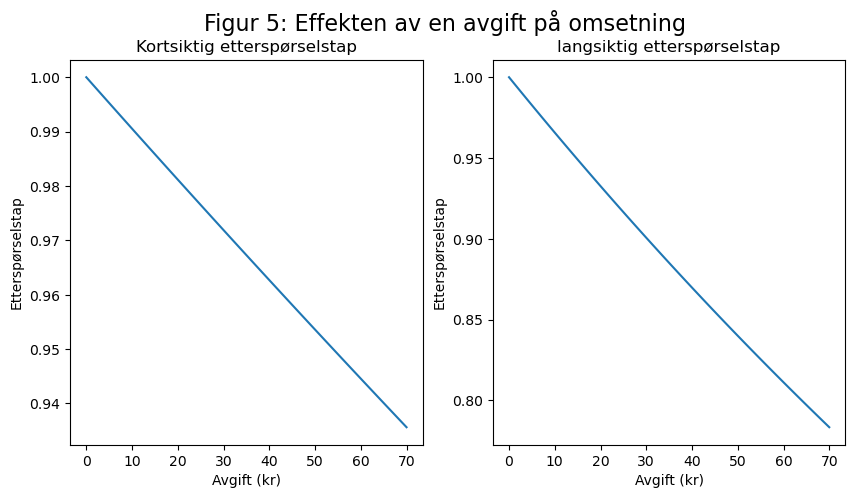

In [3]:
def etterspørsels_endring(p,x): #gjennomsnittlig hotelromspris og priselasitets funksjon
    return ((1-p)**(x/720*100))

p_num=np.linspace(0,70)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(p_num, etterspørsels_endring(0.00682,p_num), label='Kortsiktig etterspørselstap')
axes[0].set_xlabel('Avgift (kr)')
axes[0].set_ylabel('Etterspørselstap')
axes[0].set_title('Kortsiktig etterspørselstap')


axes[1].plot(p_num, etterspørsels_endring(0.0248,p_num), label='Langsiktig etterspørselstap')
axes[1].set_xlabel('Avgift (kr)')
axes[1].set_ylabel('Etterspørselstap')
axes[1].set_title('langsiktig etterspørselstap')

fig.suptitle('Figur 5: Effekten av en avgift på omsetning', fontsize=16)

plt.show()

Når vi vet hva priselastisiteten er, kan vi beregne hvordan etterspørsel blir påvirket av en overnattingsskatt. En analyse vi bruker gjennomsnittsprisene på hotellrom i Oslo, som er omtrent 720 kr (SSB, 2004), og priselastisitet på -0.682 kortsiktig og -2.48 langsiktig. Ved hjelp av priselastisitetene man plotte en figur som viser hvordan etterspørselen påvirkes av en avgift fra 0-10 prosent av gitt pris. På kort sikt vil etterspørselstapet ligge på omkring 6 prosent (figur 5), og på lang sikt vil samme avgift gi et etterspørselstap på litt over 20 prosent. 

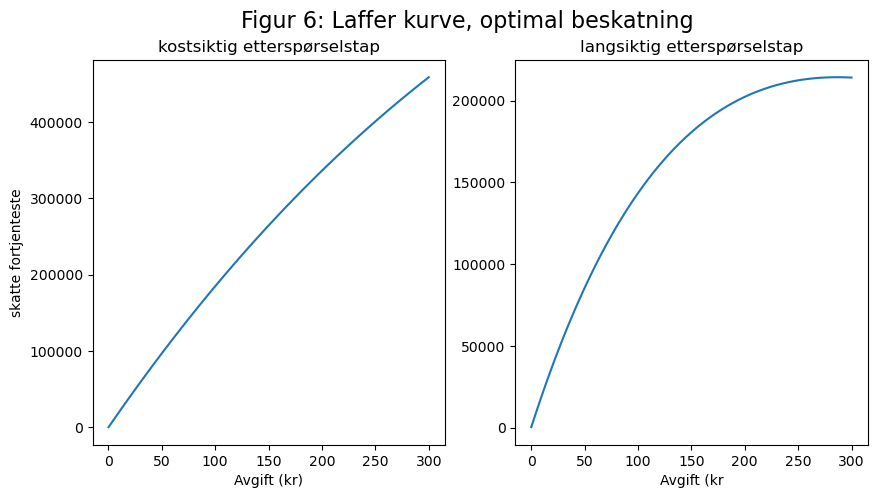

In [27]:
def avgiftsproveny(x):
    return ((2031638890*((1-0.0248)**(x/720*100)))*x)/1000000 #laffer formel langsiktig

def avgiftsproveny1(x):
    return ((2031638890*((1-0.00682)**(x/720*100)))*x)/1000000 #laffer formel kostsiktig

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(p_num, avgiftsproveny1(p_num))
axes[0].set_xlabel('Avgift (kr)')
axes[0].set_ylabel('skatte fortjenteste')
axes[0].set_title('kostsiktig etterspørselstap')

axes[1].plot(p_num, avgiftsproveny(p_num))
axes[1].set_xlabel('Avgift (kr')
axes[1].set_title('langsiktig etterspørselstap')

fig.suptitle('Figur 6: Laffer kurve, optimal beskatning', fontsize=16)

plt.show()

Funksjonen på etterspørselstap som følge av prisøkning på overnattinger gir grunnlag for å lage en laffer-kurve for å finne avgift proveny mellom 0-10 prosent avgift av gjennomsnittsprisen. Dette gjøres ved å multiplisere etterspørselstap funksjonen med totalt antall overnattinger i norge som var 2031638890 i 2022. Laffer kurven (Figur 6) viser en oppadgående trend både kortsiktig og langsiktig, og at en  skatt på 10 prosent avgiftsprovenyen en hypotetisk, men viser en trend. Dette samsvarer det vi fant ut fra figur 5, da priselastisitet på lengere sikt sørge for reduserte inntekter.

Text(0.5, 1.0, 'Figur 7: Laffer kurve, optimal beskatning')

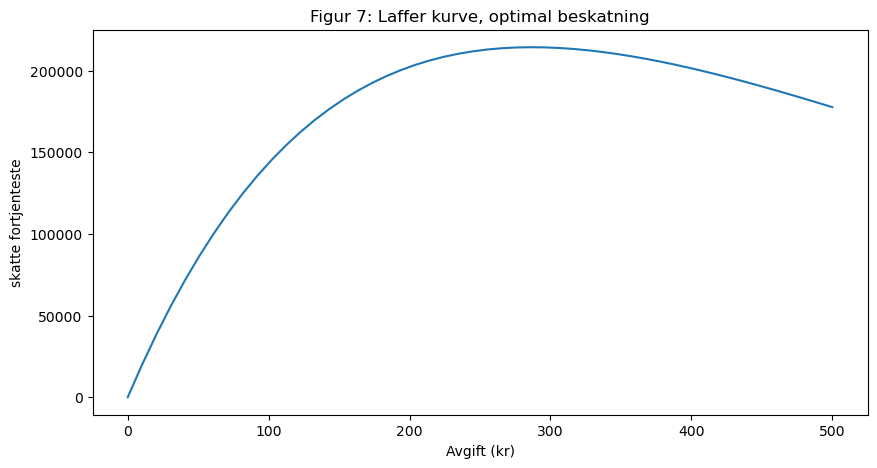

In [29]:
p_num=np.linspace(0,500)


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(p_num, avgiftsproveny(p_num))
ax.set_xlabel('Avgift (kr)')
ax.set_ylabel('skatte fortjenteste')
ax.set_title('Figur 7: Laffer kurve, optimal beskatning')

Laffer kurven brukes for å finne sats for optimal avgifts proveny noe som ligger i toppunktet til kurven hvor fortjenesten er størst. I figur 6 når ingen av grafene sitt toppunkt, noe tyder på at en avgift mellom 0 og 10 prosent av hotellromprisen ikke er den optimale tilpasningen. Hvis vi utvider x-aksen finner vi at den optimal satsen langsiktig er 228 prosent av gjennomsnittsprisen (Figur 7). Dette er lite sannsynlig da en beskatning over 200 prosent er urealistisk og vil neppe være den optimale tilpasningen. Derfor er det viktig å merke seg at laffer-kurven kun er en modell og ikke tar ibruk utenforliggende faktorer.

Konklusjon

En turistskatt kan i stor grad hjelpe med finansiering av fellesgoder brukt av både turister og lokalbefolkningen. Formålet med skatten er å lette på skattebyrdene på lokalbefolkningen og lokale bedrifter, og sørge for at norsk natur blir ivaretatt på en best mulig måte. Norske hoteller er allerede noen av de dyreste i verden, og en skatt kan føre til en konkurranse ulempe på verdensmarkedet, hvor reiselivsbransjen kan være svært pris sensitiv. Ved hjelp av mikroøkonomiske modeller kan man finne et hypotetisk utfall av skatten, og det er viktig å veie inn disse faktorene for å kunne implementere en overnattingsskatt.

En sesong justert skatt vil være essensielt for å øke bærekraften, og redusere trykket i høysesongen. Fordelingen av skatten må ikke være ujevn da et økende cruisemarked og private utleiere kan gjøre det vanskelig å innkreve skatt. Et bidrag for dagsturister kan i stor grad være nødvendig for å utjevne dette, men kan gjøre det enda vanskeligere å etablere en god løsning på en turistskatt. Derfor er det viktig at skatten iverksettes på en god og bærekraftig måte.


Bibliografi

Alshboul, K. (2016). Assessing Local Community Involvement in Tourism Development around a Proposed World Heritage Site in Jerash, Jordan. University of Waterloo, Canada.

Anja. (2023, 03 14). Nordic marketing. Retrieved from Cruise traffic in Norway on the rise: https://www.nordicmarketing.de/en/blog/cruise-traffic-in-norway-on-the-rise

Deane, S. (2022, 01 4). stratosjets. Retrieved from 2022 Airbnb Statistics: Usage, Demographics, and Revenue Growth: https://www.stratosjets.com/blog/airbnb-statistics/

Dybedal, P., Jean-Hansen, V., Ibenholt, K., & Brendemoen, A. (2003, 09). Betydningen av indirekte skatter og avgifter for norske reiselivsnæringers konkurranseevne. Transportøkonomisk institutt.

innovasjon Norge. (2019). Key Figures for Norwegian Travel and Tourism. Retrieved from https://assets.simpleviewcms.com/simpleview/image/upload/v1/clients/norway/Key_figures_2019_70ab0c61-9c91-4b2a-b450-63898baceccc.pdf

Kolinsky, M. (2021, Vår). Bærekraftig utvikling av reiselivet i Moskenes kommune. Tromsø, Norge.

Laura Pole, T. G. (2021). TOURISM TAX MODEL FOR DEVELOPMENT OF REGIONS. Turiba University, Latvia.

Markedshøyskolen. (2011, 06 10). Examining Norway’s destination image and French tourists’ travel choice behavior.

News in France. (2023, 01). Retrieved from Tourist tax: the island of Oléron claims 30 million euros from Airbnb: https://newsinfrance.com/tourist-tax-the-island-of-oleron-claims-30-million-euros-from-airbnb/

NHO reiseliv. (n.d.). Retrieved from Turistskatt: https://www.nhoreiseliv.no/vi-mener/barekraftig-reiseliv/turistskatt/

NHO reiseliv. (n.d.). Retrieved from Reiselivets verdi: Destinasjonsanalyser: https://www.nhoreiseliv.no/tall-og-fakta/reiselivets-verdi-destinasjon/#part5

Regjeringen.no. (2023, 01 19). Retrieved from Vurderer destinasjoner for besøksbidrag: https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954

SSB. (2004, 05 05). Hotellstatistikk, mars 2004. Retrieved from Hotellprisene rett i været – men nå er bransjen bekymret: https://www.ssb.no/transport-og-reiseliv/statistikker/hotell/maaned/2004-05-05

statista. (2022, 11 15). Retrieved from Monthly number of international tourist overnight stays in hotels and similar establishments in Italy from January 2019 to August 2022: https://www.statista.com/statistics/1135461/monthly-number-of-tourist-overnight-stays-in-hotels-in-italy/

Venezia autentica. (n.d.). Retrieved from The Tourist Tax in Venice : https://veneziaautentica.com/venice-tourist-tax/
Williams, B. (2023, 03 18). dreambigtravelfarblog. Retrieved from 40+ Fascinating Airbnb Statistics (2023): https://www.dreambigtravelfarblog.com/blog/airbnb-statistics


Figurer:

Figur 1 data hentet fra: https://www.ssb.no/statbank/table/10638

Figur 2 data hentet fra: https://www.ssb.no/statbank/table/09374/tableViewLayout1/, https://www.ssb.no/statbank/table/12892/tableViewLayout1/ 

Figur 3 kode inspirert av: sok-1006-Forelesnings notater

Figur 4 kode inspirert av: sok-1006-Forelesnings notater

Figur 5 kode inspirert av: sok-1006-Forelesnings notater

Figur 6 kode inspirert av: sok-1006-Forelesnings notater

Figur 7 kode inspirert av: sok-1006-Forelesnings notater


